In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import scipy.stats
from scipy.integrate import simpson
import numpy as np
import sys
sys.path.append('/Users/kelly/koskella_lab')
from tools import *

In [8]:
#functions

def clean_and_transpose(df, start_row=32, end_row=106):
    new_df = df.iloc[start_row:end_row]
    df_transposed = new_df.T
    df_transposed.columns = df_transposed.iloc[0]
    df_transposed = df_transposed[1:]
    df_transposed.index = pd.to_numeric(df_transposed.iloc[:, 0], errors='coerce') / 3600
    cleaned_df = df_transposed.iloc[:, 2:]
    cleaned_df.columns.name = 'Series'
    cleaned_df = cleaned_df.apply(pd.to_numeric, errors='coerce')
    return cleaned_df

    
def plot_timeseries(dataframe, title = None):
    plt.figure(figsize=(11, 6))
    for column in dataframe.columns:
        sns.scatterplot(data=dataframe, x=dataframe.index, y=dataframe[column], label=column, s=11)
    plt.xlabel('Time (hr)')
    plt.ylabel('OD reading') 
    plt.title(title)
    plt.legend(title='Series', bbox_to_anchor=(1.05, 1.0), loc='upper left', ncol=3)
    plt.tight_layout() 
    plt.show()

In [9]:
df_03 = pd.read_csv('/Users/kelly/Desktop/CE_KH_RBG100324.csv')
cleaned_df_03 = clean_and_transpose(df_03, start_row=31, end_row=101)
cleaned_df_03_1 = cleaned_df_03.drop(columns = ['C12', 'D12', 'E12'])
df_31 = pd.read_csv('/Users/kelly/Desktop/CE-KH_RBG_10312024.csv')
cleaned_df_31 = clean_and_transpose(df_31, start_row=32, end_row=106)
cleaned_df_31_1 = cleaned_df_31.drop(columns = cleaned_df_31.loc[:, 'F1':'F4'].columns)
cleaned_df_31_1 = cleaned_df_31.drop(columns = ['B12', 'C12', 'D12'])

In [10]:
thousandPFUs_03 =cleaned_df_03_1.loc[:, 'D1':'F8']

ten_thousandPFUs_03 = cleaned_df_03_1.loc[:,'A1':'C11']


thousand_endpoint_df_03 = pd.DataFrame({
    '15 min': thousandPFUs_03.iloc[1],
    '24 hr': thousandPFUs_03.iloc[-1]
})

ten_thousand_endpoint_df_03 = pd.DataFrame({
    '15 min': ten_thousandPFUs_03.iloc[1],
    '24 hr': ten_thousandPFUs_03.iloc[-1]
})

thousand_endpoint_df_03 = thousand_endpoint_df_03[(thousand_endpoint_df_03['15 min'] < 0.25) & (thousand_endpoint_df_03['15 min'] > 0.15)]
ten_thousand_endpoint_df_03 = ten_thousand_endpoint_df_03[(ten_thousand_endpoint_df_03['15 min'] < 0.25) & (ten_thousand_endpoint_df_03['15 min'] > 0.15)]
thousand_endpoint_df_03

,15 min,24 hr
Series,,
D1,0.2282,0.1197
D3,0.1668,0.1202
D4,0.1829,0.1489
D5,0.1778,0.1346
D8,0.2314,0.1539
D9,0.2228,0.1317
D10,0.1802,0.1278
D11,0.1820,0.2078
E1,0.2213,0.1182


In [55]:
thousandPFUs_31 =cleaned_df_31_1.loc[:,'A1':'C11']

ten_thousandPFUs_31 = cleaned_df_31_1.loc[:, 'D1':]


thousand_endpoint_df_31 = pd.DataFrame({
    '15 min': thousandPFUs_31.iloc[0],
    '24 hr': thousandPFUs_31.iloc[-1]
})

ten_thousand_endpoint_df_31 = pd.DataFrame({
    '15 min': ten_thousandPFUs_31.iloc[0],
    '24 hr': ten_thousandPFUs_31.iloc[-1]
})

thousand_endpoint_df_31 = thousand_endpoint_df_31[(thousand_endpoint_df_31['15 min'] < 0.25) & (thousand_endpoint_df_31['15 min'] > 0.15)]
ten_thousand_endpoint_df_31 = ten_thousand_endpoint_df_31[(ten_thousand_endpoint_df_31['15 min'] < 0.25) & (ten_thousand_endpoint_df_31['15 min'] > 0.15)]
ten_thousand_endpoint_df_31

,15 min,24 hr
Series,,
D1,0.2150,0.1504
D2,0.2342,0.1377
D4,0.1976,0.1395
D5,0.1982,0.1364
D7,0.2196,0.2035
D8,0.2184,0.2423
D10,0.1924,0.2011
D11,0.1850,0.2404
E1,0.2213,0.1369


In [56]:
#03, 10^3
thousval = thousand_endpoint_df_03['15 min'].values
thousandPFUs_03_T = thousandPFUs_03.T
thousandPFUs_03_T = thousandPFUs_03_T[thousandPFUs_03_T.iloc[:, 1].isin(thousval)]
thousandPFUs_03_TT = thousandPFUs_03_T.T
thousandPFUs_03_TT

#03, 10^4

tenthousval = ten_thousand_endpoint_df_03['15 min'].values
ten_thousandPFUs_03_T = ten_thousandPFUs_03.T
ten_thousandPFUs_03_T = ten_thousandPFUs_03_T[ten_thousandPFUs_03_T.iloc[:, 1].isin(tenthousval)]
ten_thousandPFUs_03_TT = ten_thousandPFUs_03_T.T
ten_thousandPFUs_03_TT

#31, 10^3

thousval31 = thousand_endpoint_df_31['15 min'].values
thousandPFUs_31_T = thousandPFUs_31.T
thousandPFUs_31_T = thousandPFUs_31_T[thousandPFUs_31_T.iloc[:, 0].isin(thousval31)]
thousandPFUs_31_TT = thousandPFUs_31_T.T

#31, 10^4
tenthousval31 = ten_thousand_endpoint_df_31['15 min'].values
ten_thousandPFUs_31_T = ten_thousandPFUs_31.T
ten_thousandPFUs_31_T = ten_thousandPFUs_31_T[ten_thousandPFUs_31_T.iloc[:, 0].isin(tenthousval31)]
ten_thousandPFUs_31_TT = ten_thousandPFUs_31_T.T

In [57]:
#merge the graphs

fullthousand = pd.merge_asof(
    thousandPFUs_03_TT, 
    thousandPFUs_31_TT, 
    on="Time [s]", 
    direction="nearest", 
    tolerance=1
).set_index("Time [s]")

fulltenthousand = pd.merge_asof(
    ten_thousandPFUs_03_TT, 
    ten_thousandPFUs_31_TT, 
    on="Time [s]", 
    direction="nearest", 
    tolerance=1
).set_index("Time [s]")
fulltenthousand

Series,A2,A3,A4,A5,A6,A7,A8,A9,A11,B1,...,E4,E5,E7,E8,E12,F6,F7,F8,F10,F12
Time [s],,,,,,,,,,,,,,,,,,,,,
0.000000,0.2537,0.1846,0.1820,0.2378,0.1852,0.1530,0.2847,0.2426,0.2453,0.2313,...,0.2084,0.1744,0.2174,0.2166,0.1554,0.2109,0.1655,0.1609,0.1735,0.1837
0.250028,0.2478,0.1849,0.1660,0.2389,0.1821,0.1511,0.2133,0.2495,0.2435,0.2312,...,0.1949,0.1395,0.1798,0.1828,0.1569,0.2095,0.1700,0.1652,0.1734,0.1833
0.500056,0.2384,0.1932,0.1812,0.1962,0.1860,0.1633,0.2138,0.2586,0.2479,0.2355,...,0.2000,0.1413,0.1844,0.1863,0.1601,0.2156,0.1745,0.1720,0.1746,0.1861
0.750083,0.2341,0.1941,0.1825,0.1959,0.1911,0.1663,0.2140,0.2636,0.2488,0.2396,...,0.2023,0.1411,0.1871,0.1890,0.1627,0.2197,0.1769,0.1751,0.1752,0.1897
1.000111,0.2342,0.1971,0.1842,0.1974,0.1929,0.1680,0.2152,0.2681,0.2542,0.2440,...,0.2032,0.1428,0.1891,0.1901,0.1648,0.2214,0.1802,0.1760,0.1761,0.1919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22.752194,0.1228,0.1276,0.1139,0.1211,0.1243,0.1407,0.1320,0.1360,0.1430,0.1219,...,0.1649,0.2076,0.3070,0.2613,0.2765,0.1996,0.1590,0.2318,0.2280,0.3353
23.002222,0.1231,0.1283,0.1139,0.1208,0.1243,0.1421,0.1321,0.1358,0.1432,0.1227,...,0.1682,0.2049,0.3062,0.2602,0.2773,0.1974,0.1566,0.2306,0.2272,0.3372
23.252250,0.1234,0.1290,0.1141,0.1208,0.1243,0.1433,0.1323,0.1362,0.1435,0.1232,...,0.1726,0.2024,0.3057,0.2592,0.2753,0.1948,0.1559,0.2278,0.2260,0.3366


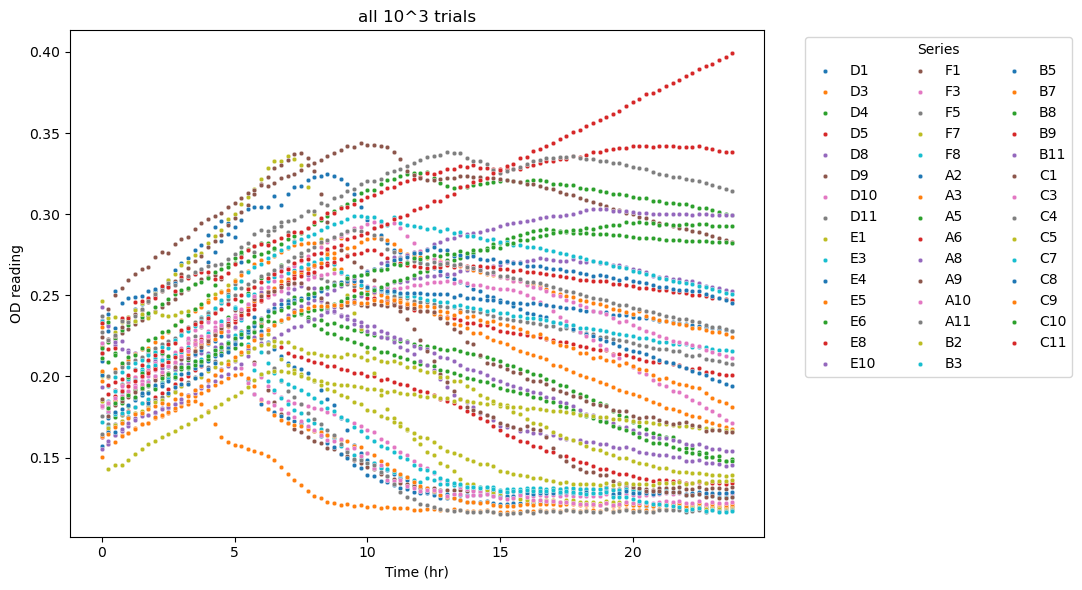

In [58]:
plot_timeseries(fullthousand, title = 'all 10^3 trials')

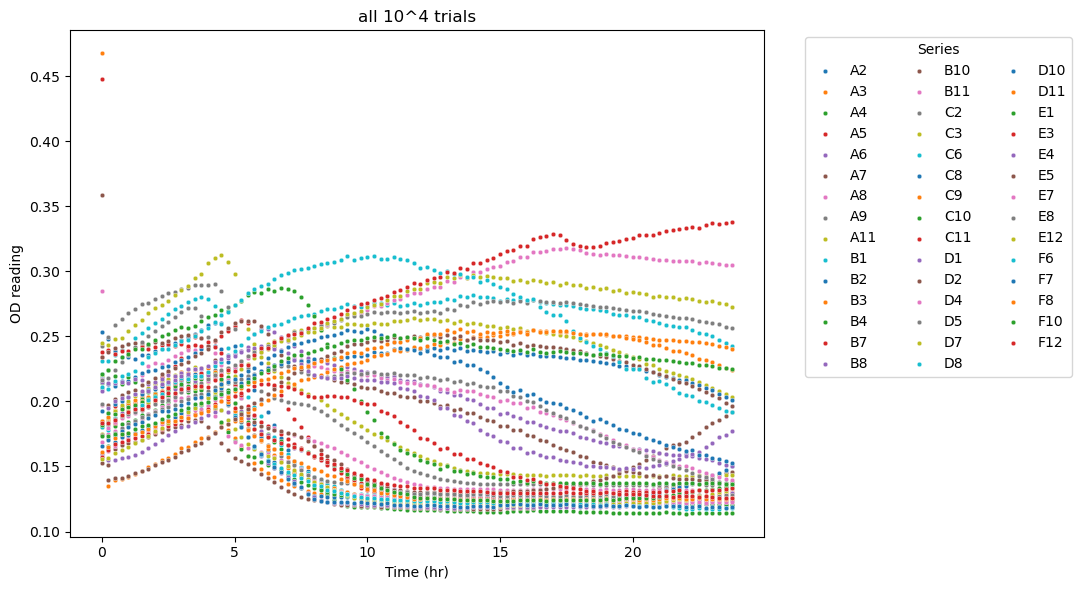

In [59]:
plot_timeseries(fulltenthousand, title = 'all 10^4 trials') 

In [16]:

auc_values_3 = {col: np.trapz(fullthousand[col], x=fullthousand.index) for col in fullthousand.columns}

auc_values_4 = {col: np.trapz(fulltenthousand[col], x=fulltenthousand.index) for col in fulltenthousand.columns}


193.67446399597998

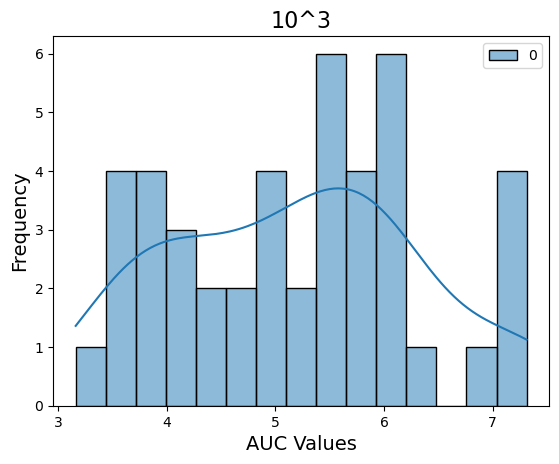

In [17]:
sns.histplot(auc_values_3.values(), bins=15, kde=True)
plt.xlabel('AUC Values', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('10^3', fontsize=16)
sum(auc_values_4.values())

Text(0.5, 1.0, '10^4')

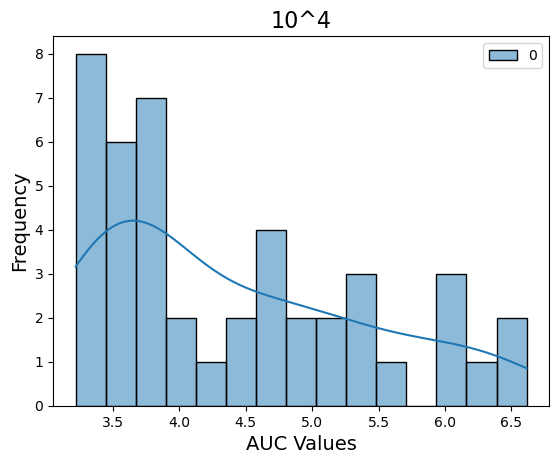

In [18]:
sns.histplot(auc_values_4.values(), bins=15, kde=True)
plt.xlabel('AUC Values', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('10^4', fontsize=16)


<Axes: ylabel='Density'>

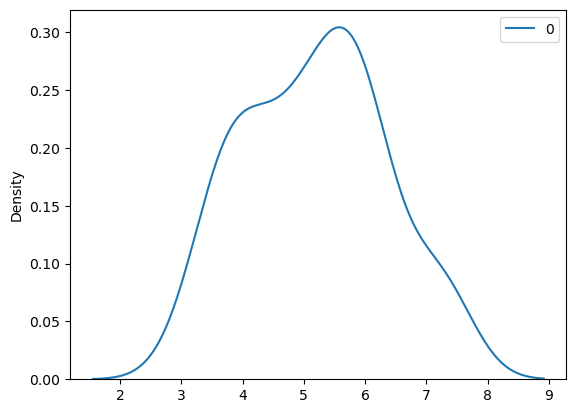

In [19]:
#sns.kdeplot(auc_values_4.values(), bw_adjust=2)
sns.kdeplot(auc_values_3.values(), bw_adjust=1)

In [20]:
from scipy import stats
#null: not normal 
#alt: normal

auc_values_list_3 = list(auc_values_3.values())

stats.normaltest(auc_values_list_3)

NormaltestResult(statistic=2.4263638936855068, pvalue=0.29724993952999057)

In [21]:
auc_values_list_4 = list(auc_values_4.values())
stats.normaltest(auc_values_list_4)


NormaltestResult(statistic=5.449482349289111, pvalue=0.06556316993291884)

In [22]:
#histogram negative controls AUC

In [23]:
controls03 = cleaned_df_03.loc[:, ['C12', 'D12', 'E12']] 
controls31 = cleaned_df_31.loc[:, ['B12', 'C12', 'D12']]
fullcontrols = pd.merge_asof(
    controls03, 
    controls31, 
    on="Time [s]", 
    direction="nearest", 
    tolerance=1
).set_index("Time [s]")
auc_values_controls = {col: np.trapz(fullcontrols[col], x=fullcontrols.index) for col in fullcontrols.columns}

<Axes: ylabel='Count'>

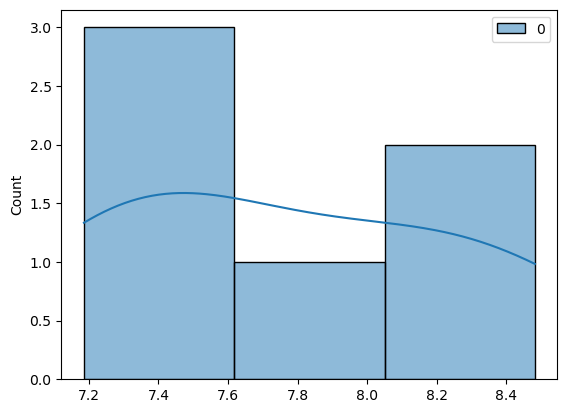

In [24]:
sns.histplot(auc_values_controls.values(), bins=3, kde=True)

In [25]:
fulltenthousand

Series,A2,A3,A4,A5,A6,A7,A8,A9,A11,B1,...,E4,E5,E7,E8,E12,F6,F7,F8,F10,F12
Time [s],,,,,,,,,,,,,,,,,,,,,
0.000000,0.2537,0.1846,0.1820,0.2378,0.1852,0.1530,0.2847,0.2426,0.2453,0.2313,...,0.2084,0.1744,0.2174,0.2166,0.1554,0.2109,0.1655,0.1609,0.1735,0.1837
0.250028,0.2478,0.1849,0.1660,0.2389,0.1821,0.1511,0.2133,0.2495,0.2435,0.2312,...,0.1949,0.1395,0.1798,0.1828,0.1569,0.2095,0.1700,0.1652,0.1734,0.1833
0.500056,0.2384,0.1932,0.1812,0.1962,0.1860,0.1633,0.2138,0.2586,0.2479,0.2355,...,0.2000,0.1413,0.1844,0.1863,0.1601,0.2156,0.1745,0.1720,0.1746,0.1861
0.750083,0.2341,0.1941,0.1825,0.1959,0.1911,0.1663,0.2140,0.2636,0.2488,0.2396,...,0.2023,0.1411,0.1871,0.1890,0.1627,0.2197,0.1769,0.1751,0.1752,0.1897
1.000111,0.2342,0.1971,0.1842,0.1974,0.1929,0.1680,0.2152,0.2681,0.2542,0.2440,...,0.2032,0.1428,0.1891,0.1901,0.1648,0.2214,0.1802,0.1760,0.1761,0.1919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22.752194,0.1228,0.1276,0.1139,0.1211,0.1243,0.1407,0.1320,0.1360,0.1430,0.1219,...,0.1649,0.2076,0.3070,0.2613,0.2765,0.1996,0.1590,0.2318,0.2280,0.3353
23.002222,0.1231,0.1283,0.1139,0.1208,0.1243,0.1421,0.1321,0.1358,0.1432,0.1227,...,0.1682,0.2049,0.3062,0.2602,0.2773,0.1974,0.1566,0.2306,0.2272,0.3372
23.252250,0.1234,0.1290,0.1141,0.1208,0.1243,0.1433,0.1323,0.1362,0.1435,0.1232,...,0.1726,0.2024,0.3057,0.2592,0.2753,0.1948,0.1559,0.2278,0.2260,0.3366


In [29]:
df = pd.read_csv('/Users/kelly/Downloads/KH_RBG2_02282025.csv')
df = clean_and_transpose(df, 33, 131)
df = df.rename_axis('Time [hr]')
clean_df = remove_outliers(df, 1)

In [32]:
list_char = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
tables = {}
num = -1

for char in list_char:
    tables[char] = df.filter(regex=f'^{char}')
    if char == 'A':
        title = f'row {char} - 0 PFU'
    elif char == 'B':
        title = f'row {char} - < 10 PFU'
    else:
        title = f'row {char} - 10^{num} phage'
    #plot_timeseries_interactive(tables[char], title, 'Wells')
    num+=1

In [54]:
from scipy.stats import levene

technical_rep = tables.get('F').to_numpy().flatten() 
biol_rep = fulltenthousand.to_numpy().flatten() 

stat, p_value = levene(technical_rep, biol_rep, center='median')
print(f"Levene’s test statistic: {stat}, p-value: {p_value}")

if p_value < 0.05:
    print("Reject null hypothesis: Variances are significantly different.")
else:
    print("Fail to reject null hypothesis: Variances are not significantly different.")

Levene’s test statistic: 241.81573066018305, p-value: 2.266995930056248e-53
Reject null hypothesis: Variances are significantly different.


In [62]:
var1 = np.var(technical_rep, ddof=1)  # Sample variance
var2 = np.var(biol_rep, ddof=1)

print(f"Levene’s test statistic: {stat:.4f}, p-value: {p_value:.4f}")
print(f"Variance of group 1: {var1:.4f}")
print(f"Variance of group 2: {var2:.4f}")

# Interpretation
if p_value < 0.05:
    print("Variances are significantly different.")
    if var1 < var2:
        print("Group 1 has less variance.")
    else:
        print("Group 2 has less variance.")
else:
    print("Variances are not significantly different.")

Levene’s test statistic: 241.8157, p-value: 0.0000
Variance of group 1: 0.0018
Variance of group 2: 0.0032
Variances are significantly different.
Group 1 has less variance.
